# **Cohere Command Foundation Model**
- Desenvolvido pela Cohere
Propósito: Projetado para processamento de linguagem natural (NLP) e criação de texto.
Capacidades:
Geração de Texto: Capaz de criar texto coeso e relevante em diversos contextos.

1.   Compreensão de Contexto: Entende e mantém o contexto ao longo de longas passagens de texto.
2.   Personalização: Permite ajustar e personalizar o modelo para tarefas específicas e domínios variados.
3.   Suporte Multilíngue: Suporta múltiplos idiomas, facilitando a aplicação em diferentes linguagens.
4. Integração: Fácil integração com outras ferramentas e fluxos de trabalho existentes, proporcionando flexibilidade no desenvolvimento de aplicações.
5. Atualizações e Melhorias: Regularmente atualizado com novas técnicas e dados para melhorar continuamente o desempenho e a precisão.
link : https://dashboard.cohere.com/welcome/login

In [1]:
# instalar o sdk do python do cohere
!pip install cohere==4.4.1

In [38]:
# importando
import cohere
import numpy as np
import seaborn as sns

# Para usar o Cohere Command Foundation Model em Python
 você precisará obter uma chave de API do Cohere, API_KEY

1. **Criar a conta no Cohere**:
   - Entre em https://dashboard.cohere.com/welcome/login e sign up
   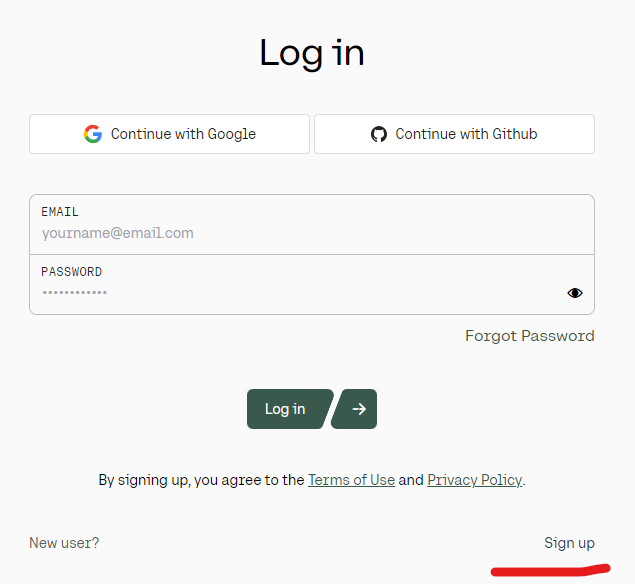

2. **Gerando chave API key**:
   - depois de criado a conta, faço o login Cohere.
   - Vá menu API Keys ou pelo link https://dashboard.cohere.com/api-keys
   - Clique em "Create trial Key".
   - Dê um nome API key e
   - Clique gerar 'trial key'
   - Copie o API_KEY
   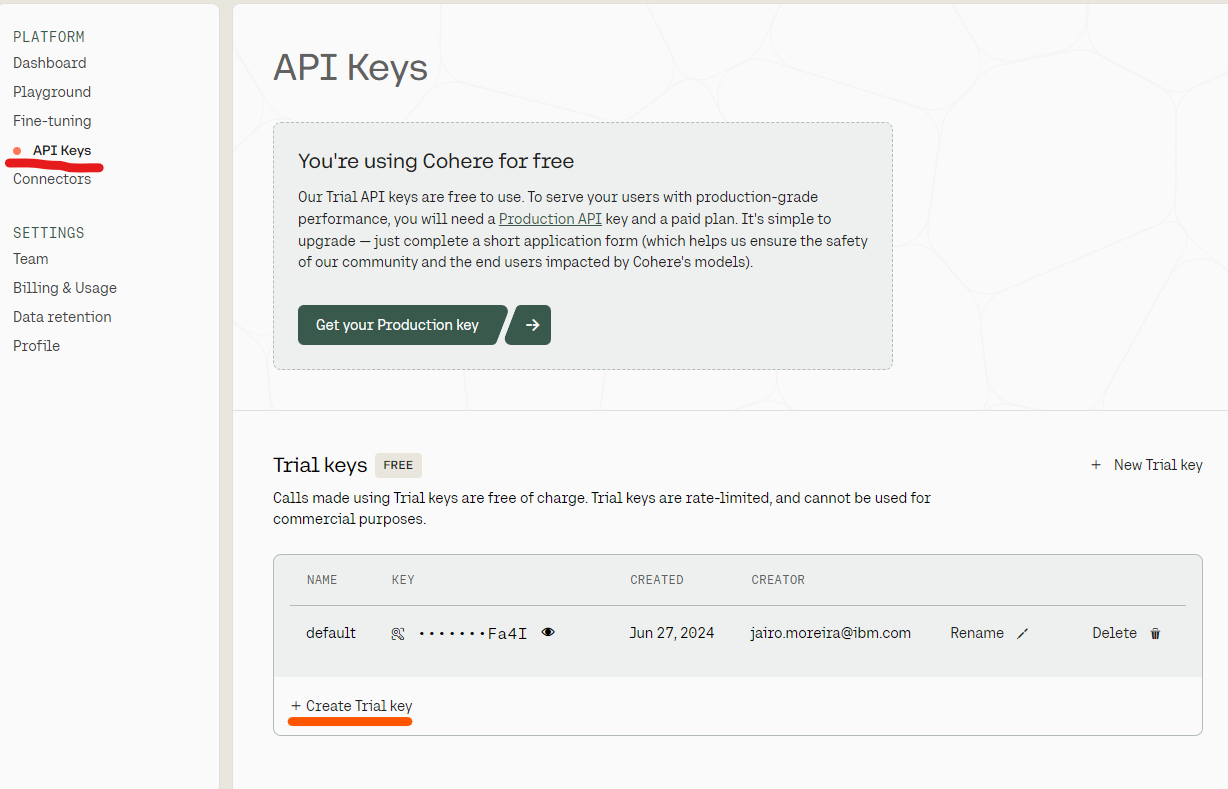

3. **Armazene API key seguramente**:
   - Sua API key é secreta, use no notebook como desenvolvimento
   - se for para produção use env do python
   

In [61]:


api_key = '' # Cole sua API key aqui. Este é a trial key. São grátis do Cohere.
co = cohere.Client(api_key)

## Gerando os textos para embeddings

** se der erro: "You are using a Trial key, which is limited to 100 API calls / minute" espere um pouco para rodar ou coloque na chamada da função :
import time
time.sleep(2)


In [62]:

meios_de_transporte = [
    "Carro",
    "Motocicleta",
    "Bicicleta",
    "Ônibus",
    "Metrô",
    "Trem",
    "Avião",
    "Navio",
    "Barco",
    "Caminhão",
    "Patinete",
    "Skate",
    "Monociclo",
    "Carreta",
    "Furgão",
    "Táxi",
    "Moto",
    "Uber",
    "99",
    "Cabify",
    "A pé",
    "Coelho"
]
def gerando_embeddings(texto: str):
  try:
    return np.array(co.embed([texto], model="large").embeddings)
  except Exception as e:
    print(f"Erro ao gerar embeddings para {texto}: {e}")
    return None

for meio in meios_de_transporte:
  embeddings = gerando_embeddings(meio)

embeddings_dict = {}
for meio in meios_de_transporte:
  embeddings = gerando_embeddings(meio)
  embeddings_dict[meio] = embeddings
  print(embeddings)

[[ 1.8115234  -0.92578125 -0.1418457  ... -1.1220703  -1.5253906
   0.13269043]]
[[ 3.3046875  -1.3945312   0.53564453 ... -0.5546875  -0.22753906
  -0.71191406]]
[[ 0.3852539  -0.53564453  0.31591797 ...  0.10595703  0.34228516
  -1.3808594 ]]
[[ 1.3095703  -0.4970703  -0.10552979 ... -0.99609375  0.92285156
  -0.46044922]]
[[ 1.9023438  -0.71533203 -0.76708984 ... -1.1318359  -0.92333984
   0.12322998]]
[[ 2.2851562   1.71875    -0.2524414  ... -0.11425781  0.27661133
   0.953125  ]]
[[ 1.6142578  -2.9941406   0.22058105 ...  0.20544434  0.8828125
  -1.3720703 ]]
[[ 3.5546875  -0.09960938  0.71875    ...  0.6230469  -1.5976562
   1.5820312 ]]
[[ 1.6191406  -0.3959961   1.8037109  ...  0.4399414  -0.515625
  -0.15112305]]
[[ 1.1113281  -1.7255859  -0.3071289  ... -0.0723877   1.5097656
  -0.19372559]]
[[ 1.6533203 -0.6381836 -1.8320312 ... -2.8769531 -1.0351562 -1.4570312]]
[[ 1.34375     0.875      -1.0214844  ... -2.2167969   0.40063477
   1.3876953 ]]
[[ 2.4296875  -0.33007812  0.7

In [63]:
embeddings_dict

{'Carro': array([[ 1.8115234 , -0.92578125, -0.1418457 , ..., -1.1220703 ,
         -1.5253906 ,  0.13269043]]),
 'Motocicleta': array([[ 3.3046875 , -1.3945312 ,  0.53564453, ..., -0.5546875 ,
         -0.22753906, -0.71191406]]),
 'Bicicleta': array([[ 0.3852539 , -0.53564453,  0.31591797, ...,  0.10595703,
          0.34228516, -1.3808594 ]]),
 'Ônibus': array([[ 1.3095703 , -0.4970703 , -0.10552979, ..., -0.99609375,
          0.92285156, -0.46044922]]),
 'Metrô': array([[ 1.9023438 , -0.71533203, -0.76708984, ..., -1.1318359 ,
         -0.92333984,  0.12322998]]),
 'Trem': array([[ 2.2851562 ,  1.71875   , -0.2524414 , ..., -0.11425781,
          0.27661133,  0.953125  ]]),
 'Avião': array([[ 1.6142578 , -2.9941406 ,  0.22058105, ...,  0.20544434,
          0.8828125 , -1.3720703 ]]),
 'Navio': array([[ 3.5546875 , -0.09960938,  0.71875   , ...,  0.6230469 ,
         -1.5976562 ,  1.5820312 ]]),
 'Barco': array([[ 1.6191406 , -0.3959961 ,  1.8037109 , ...,  0.4399414 ,
         -0

In [64]:
print(len(embeddings_dict["Carro"][0]))
print(embeddings_dict["Carro"][0].ndim)

4096
1


In [65]:
embeddings_dict["Carro"]

array([[ 1.8115234 , -0.92578125, -0.1418457 , ..., -1.1220703 ,
        -1.5253906 ,  0.13269043]])

## Calculando o produto entre vetores (dot product similarity)
 - É uma operação matemática que envolve dois vetores de igual comprimento. Ele retorna um único número. Em geometria euclidiana, o produto escalar das coordenadas cartesianas de dois vetores é amplamente utilizado

## Similaridade entre os meios
- bicicleta
- carro
- motocicleta

## Resultaddos
*   Maior valor: indica maior similaridade entre os vetores.
*   Menor valor: indica menor similaridade entre os vetores.
*   Zero: indica que os vetores são ortogonais (perpendiculares entre si) e não possuem similaridade.

In [76]:
from numpy import dot

bicicleta = embeddings_dict["Bicicleta"][0]
carro = embeddings_dict["Carro"][0]
motocicleta = embeddings_dict["Motocicleta"][0]
uber = embeddings_dict["Uber"][0]
pe = embeddings_dict["A pé"][0]
coelho = embeddings_dict["Coelho"][0]
print("Similaridade entre bicicleta e carro:", dot(bicicleta, carro))
print("Entre carro e motocicleta:", dot(carro, motocicleta))
print("Entre bike e motocicleta:", dot(bicicleta, motocicleta))
print("Entre carro e uber:", dot(carro, uber))
print("Entre carro e a pé:", dot(carro, pe))
print("Entre uber e o coelho:", dot(uber, coelho))
print("Entre uber e o uber:", dot(uber, uber))

Similaridade entre bicicleta e carro: 5493.829931485995
Entre carro e motocicleta: 6086.816647208814
Entre bike e motocicleta: 6669.763896693862
Entre carro e uber: 3353.1499605697727
Entre carro e a pé: 5908.989699138472
Entre uber e o coelho: 3114.5768705458772
Entre uber e o uber: 7863.628152117761


## Cálculo do cosseno (cosine similarities)

- Maior valor (próximo a 1): indica que o ângulo entre os vetores é menor (próximo a 0 graus), o que significa que os vetores estão apontados na mesma direção e são mais semelhantes.
- Menor valor (próximo a -1): indica que o ângulo entre os vetores é maior (próximo a 180 graus), o que significa que os vetores estão apontados em direções opostas e são menos semelhantes.

In [83]:
from sklearn.metrics.pairwise import cosine_similarity

bicicleta = embeddings_dict["Bicicleta"]
carro = embeddings_dict["Carro"]
motocicleta = embeddings_dict["Motocicleta"]
uber = embeddings_dict["Uber"]
cabify = embeddings_dict["Cabify"]
pe = embeddings_dict["A pé"]
coelho = embeddings_dict["Coelho"]
Plutão = gerando_embeddings("Plutão")
print("Similaridade no Cosseno entre bicicleta e carro:", cosine_similarity(bicicleta, carro)[0][0])
print("Entre carro e motocicleta:", cosine_similarity(carro, motocicleta)[0][0])
print("Entre bike e motocicleta:", cosine_similarity(bicicleta, motocicleta)[0][0])
print("Entre carro e uber:", cosine_similarity(carro, uber)[0][0])
print("Entre carro e a pé:", cosine_similarity(carro, pe)[0][0])
print("Entre uber e o coelho:", cosine_similarity(uber, coelho)[0][0])
print("Entre uber e o cabify:", cosine_similarity(uber, cabify)[0][0])
print("Entre uber e o uber:", cosine_similarity(uber, uber)[0][0])
print("Entre cabify e o Plutão:", cosine_similarity(cabify, Plutão)[0][0])

Similaridade no Cosseno entre bicicleta e carro: 0.6233878334704528
Entre carro e motocicleta: 0.6671326546702735
Entre bike e motocicleta: 0.7608185596749312
Entre carro e uber: 0.3948287039281541
Entre carro e a pé: 0.6328283622972148
Entre uber e o coelho: 0.37863430604632153
Entre uber e o cabify: 0.6607661432207218
Entre uber e o uber: 0.9999999999999996
Entre cabify e o Plutão: 0.3674858013560045


## Heatmap

[Text(0.5, 0, 'carro'), Text(1.5, 0, 'bicicleta'), Text(2.5, 0, 'motocicleta')]

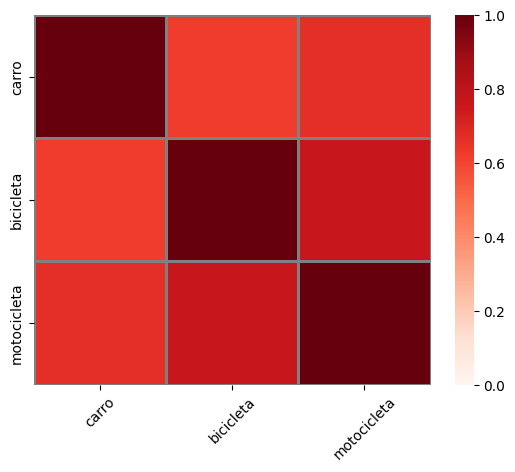

In [86]:
embeddings = [carro, bicicleta, motocicleta]
dot_product_similarities = [[cosine_similarity(embeddings[i], embeddings[j])[0][0] for i in range(len(embeddings))] for j in range(len(embeddings))]
ax = sns.heatmap(dot_product_similarities, vmin=0, vmax=1,cmap="Reds",
                 linewidths=1, linecolor='grey',
                 xticklabels=["carro", "bicicleta", "motocicleta"],
                 yticklabels=["carro", "bicicleta", "motocicleta"],
)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


##Calcular cosseno em frases

In [91]:
moto = "Motocicletas emitem muito CO2"
bicicletas = "Bicicletas não poluem"
coelho = "Pé de coelho da sorte"

moto_emb = gerando_embeddings(moto)
bicicletas_emb = gerando_embeddings(bicicletas)
coelho_emb = gerando_embeddings(coelho)

In [92]:
len(moto_emb[0])

4096

[Text(0.5, 0, 'Motocicletas emitem muito CO2'),
 Text(1.5, 0, 'Bicicletas não poluem'),
 Text(2.5, 0, 'Pé de coelho da sorte')]

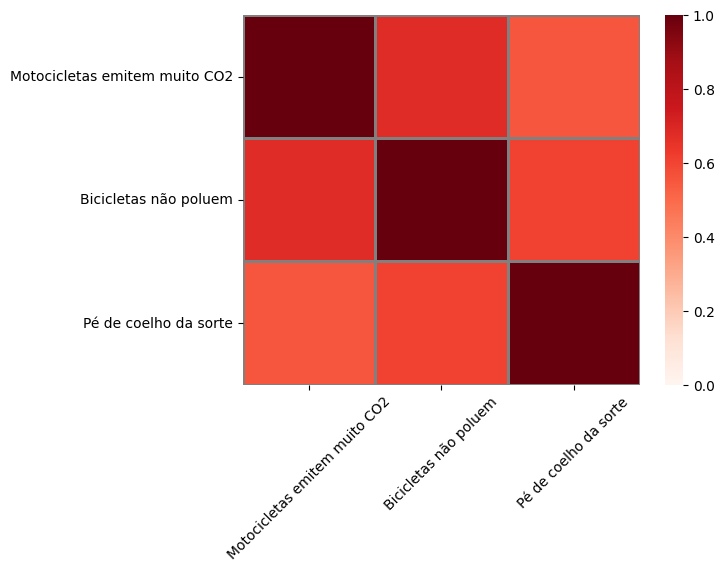

In [93]:
embeddings = [moto_emb, bicicletas_emb, coelho_emb]
dot_product_similarities = [[cosine_similarity(embeddings[i], embeddings[j])[0][0] for i in range(len(embeddings))] for j in range(len(embeddings))]
ax = sns.heatmap(dot_product_similarities, vmin=0, vmax=1,cmap="Reds",
                 linewidths=1, linecolor='grey',
                 xticklabels=[moto, bicicletas, coelho],
                 yticklabels=[moto, bicicletas, coelho],
)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)